In [25]:
#IMPORTING PACKAGES

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans

In [27]:
#READING THE DATASET AND PRINT

df= pd.read_csv ('Iris.csv')   

In [28]:
df.head(10)

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa

In [29]:
df.info()  #OVERVIEW OF DATASET

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [30]:
from IPython.display import Image
Image(url='https://cynapps-thedatafrog.s3.amazonaws.com/media/images/iris.max-1000x500.png', width=600)

In [31]:
#Statistics OF DATA

df.describe()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

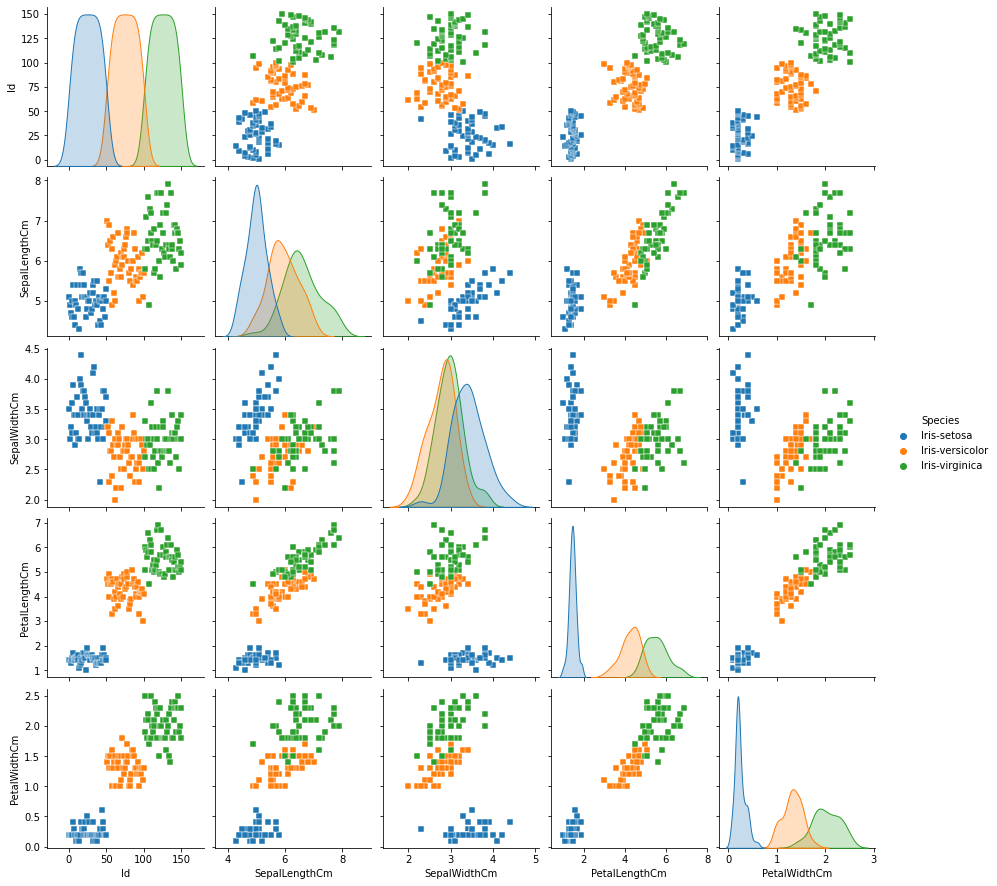

In [32]:
#VISUAL REPRESENTATION

sns.pairplot(df, hue='Species', markers='s')
plt.show()

In [33]:
#DROPING UNNECESSARY COLUMNS

df.drop("Id",inplace=True,axis=1)
df.drop("Species",inplace=True,axis=1)

<AxesSubplot:>

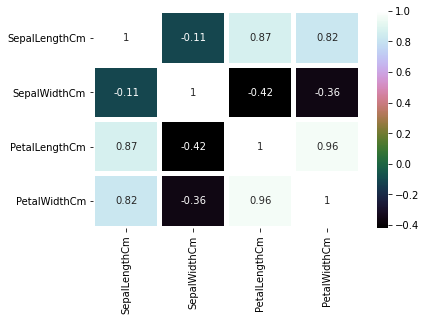

In [34]:
#HEATMAP TO SHOW CORRELATION BETWEEN EACH COLUMN

sns.heatmap(df.corr(), linecolor = 'WHITE',linewidth=4, annot=True,cmap="cubehelix")

In [35]:
#CALCULATING WITHIN-CLUSTER SUM OF SQUARE VALUE

within_cluster_sum_of_square = []
x = df.iloc[:, [0, 1, 2, 3]].values

clusters_range = range(1,15)
for k in clusters_range:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    within_cluster_sum_of_square.append(km.inertia_)

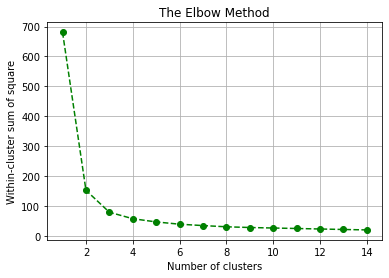

In [36]:
#USING ELBOW METHOND FOR WITHIN -CLUSTER SUM OF SQUARE

plt.plot(clusters_range, within_cluster_sum_of_square, 'go--', color='GREEN')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of square')
plt.grid()
plt.show()

In [37]:
#APPLYING K-MEANS CLUSTERING ON THE DATA

model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
predictions = model.fit_predict(df)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

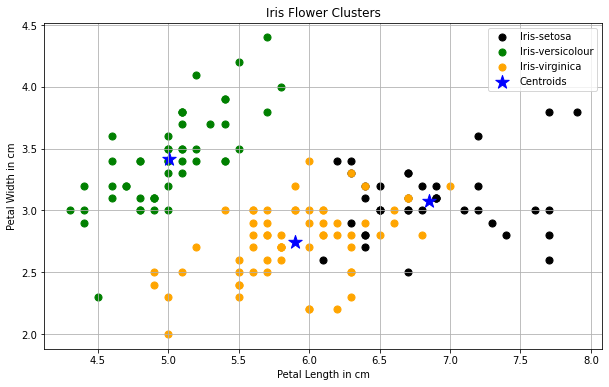

In [23]:
#FINAL VISUALS OF CLUSTERS WITH CENTROID

plt.figure(figsize=(10,6))
plt.scatter(x[predictions == 0, 0], x[predictions == 0, 1], s = 50, c = 'BLACK', label = 'Iris-setosa')
plt.scatter(x[predictions == 1, 0], x[predictions == 1, 1], s = 50, c = 'GREEN', label = 'Iris-versicolour')
plt.scatter(x[predictions == 2, 0], x[predictions == 2, 1], s = 50, c = 'ORANGE', label = 'Iris-virginica')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], s = 200, c = 'BLUE', marker = '*', label = 'Centroids')
plt.title('Iris Flower Clusters')
plt.ylabel('Petal Width in cm')
plt.xlabel('Petal Length in cm')
plt.legend()
plt.grid()
plt.show()

In [24]:
print('SUCESSFULLY PREDICTED THE CLUSTERS AND REPRESENTED VISUALLY.')

SUCESSFULLY PREDICTED THE CLUSTERS AND REPRESENTED VISUALLY.
